# Objective: Our main objective is to predict from if an Applicant will be issued visa based on given information by them

# Overview
#### RFE Request for extra document
### Are we trying to predict pre or post lottery 

#### Snapshot of Data Description for H1B_VISA
#### Reference: https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_FY16_Record_Layout.pdf

   # ![title](DataDesc1.png)
   # ![title](DataDesc2.png)

# More information related to data

In [1]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2017/H-1B_Selected_Statistics_FY2017.pdf"> Click Here For Selected Statistics</a>"""))


#### Refer to the link below for brief overview of H1B visa
#### https://www.h1base.com/visa/work/H1B%20Visa%20Overview/ref/1164/

#### This is self learning project for immigration data

#### Installing required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, preprocessing, metrics
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.



## Importing training and test set

In [3]:
train=pd.read_csv("TrainH1BLast.csv")
test=pd.read_csv("TestH1BLast No Y values.csv")

#### Glimpse of the dataset

In [4]:

train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,NaN,39300 CIVIC CENTER DRIVE,...,Y,N,Y,Y,NaN,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,NaN,1600 AMPHITHEATRE PARKWAY,...,N,N,NaN,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",NaN,2001 MARATHON AVE.,...,N,N,NaN,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",NaN,39159 PASEO PADRE PARKWAY,...,Y,N,Y,Y,NaN,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",NaN,1850 GATEWAY DR.,...,N,N,NaN,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


In [5]:
train.describe()

,Ob,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PUBLIC_DISCLOSURE_LOCATION
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4915.000000,4918.000000,4918.000000,0.0
mean,2459.500000,438568.020130,1.699268,0.766165,0.296869,0.110411,0.008337,0.231802,0.269622,71229.232574,2016.120041,82009.587885,25095.936682,NaN
std,1419.848642,204422.510048,3.857599,2.605320,1.166491,0.943281,0.105433,0.836398,1.224660,34648.534323,0.742782,48850.029727,53984.001841,NaN
min,1.000000,2122.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,0.000000,0.000000,NaN
25%,1230.250000,424240.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55895.000000,2016.000000,61922.000000,0.000000,NaN
50%,2459.500000,541511.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69628.000000,2016.000000,75795.000000,0.000000,NaN
75%,3688.750000,541511.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88067.000000,2017.000000,100000.000000,0.000000,NaN
max,4918.000000,926130.000000,75.000000,75.000000,50.000000,50.000000,2.000000,15.000000,15.000000,336000.000000,2017.000000,850000.000000,804391.000000,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 52 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null object
CASE_SUBMITTED                 4918 non-null object
DECISION_DATE                  4918 non-null object
VISA_CLASS                     4918 non-null object
EMPLOYMENT_START_DATE          4918 non-null object
EMPLOYMENT_END_DATE            4918 non-null object
EMPLOYER_NAME                  4918 non-null object
EMPLOYER_BUSINESS_DBA          375 non-null object
EMPLOYER_ADDRESS               4918 non-null object
EMPLOYER_CITY                  4918 non-null object
EMPLOYER_STATE                 4918 non-null object
EMPLOYER_POSTAL_CODE           4918 non-null object
EMPLOYER_COUNTRY               4084 non-null object
EMPLOYER_PROVINCE              47 non-null object
EMPLOYER_PHONE                 4084 non-null object
EMPLOYER_PHONE_EXT             207 non-null object
AGENT_REPRESEN

In [7]:
train['CASE_STATUS'].unique()

array(['DENIED', 'CERTIFIED'], dtype=object)

In [8]:
train['VISA_CLASS'].unique()
# Type of visa 

array(['H-1B', 'E-3 Australian', 'H-1B1 Singapore', 'H-1B1 Chile'],
      dtype=object)

##### Name of the columns 

In [9]:
columnnames=train.columns

In [10]:
# Here I have made a copy of column names in for the columns in dataset 
columnnames

Index(['Ob', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY',
       'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT',
       'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       '

In [11]:
len(train.columns)

52

In [12]:
test.head()

,Ob,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,7/12/2017,7/13/2017,H-1B,12/1/2017,11/30/2020,8SIANMEDIA CORPORATION,NaN,25 E FOOTHILL BLVD,ARCADIA,...,N,N,NaN,Y,NaN,ARCADIA,LOS ANGELES,CA,91006,NaN
1,2,2/10/2017,2/14/2017,H-1B,2/27/2017,2/26/2020,"COROS WEARABLES, INC.",NaN,3310 NOBLE POND WAY,WOODBRIDGE,...,N,N,NaN,Y,NaN,WOODBRIDGE,PRINCE WILLIAM,VA,22193,NaN
2,3,3/16/2017,3/21/2017,H-1B,6/1/2017,5/31/2020,"RELIANT MEDICAL GROUP, INC.",NaN,100 FRONT STREET,WORCESTER,...,N,N,NaN,NaN,NaN,WORCESTER,WORCESTER,MA,1608,NaN
3,4,3/25/2017,3/28/2017,H-1B,3/27/2017,3/26/2020,MYTHRI CONSULTING LLC,NaN,1721 W PLANO PARKWAY,PLANO,...,Y,N,Y,Y,NaN,PLANO,COLLIN,TX,75075,NaN
4,5,1/11/2017,1/12/2017,E-3 Australian,3/1/2017,3/1/2019,MARYAM NASSIR ZADEH CORPORATION,MARYAM NASSIR ZADEH,123 NORFOLK ST,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NEW YORK,NEW YORK,NY,10002,NaN


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 51 columns):
Ob                             2093 non-null int64
CASE_SUBMITTED                 2093 non-null object
DECISION_DATE                  2093 non-null object
VISA_CLASS                     2093 non-null object
EMPLOYMENT_START_DATE          2092 non-null object
EMPLOYMENT_END_DATE            2091 non-null object
EMPLOYER_NAME                  2092 non-null object
EMPLOYER_BUSINESS_DBA          162 non-null object
EMPLOYER_ADDRESS               2093 non-null object
EMPLOYER_CITY                  2093 non-null object
EMPLOYER_STATE                 2093 non-null object
EMPLOYER_POSTAL_CODE           2093 non-null object
EMPLOYER_COUNTRY               1768 non-null object
EMPLOYER_PROVINCE              15 non-null object
EMPLOYER_PHONE                 1768 non-null object
EMPLOYER_PHONE_EXT             96 non-null float64
AGENT_REPRESENTING_EMPLOYER    1768 non-null object
AGENT_ATTORNEY

## Printing the difference between train and test column

In [14]:
print("Variables not in test but in train : ", set(train.columns).difference(set(test.columns)))

Variables not in test but in train :  {'CASE_STATUS'}


###### As we can see above output there is only one column CASE_STATUS which is in train file but not in test and it is obvious that CASE_STATUS is the target variable which we are trying to PREDICT

#  EDA 
#### Exploratory Data Analysis

In [15]:
import missingno as msno

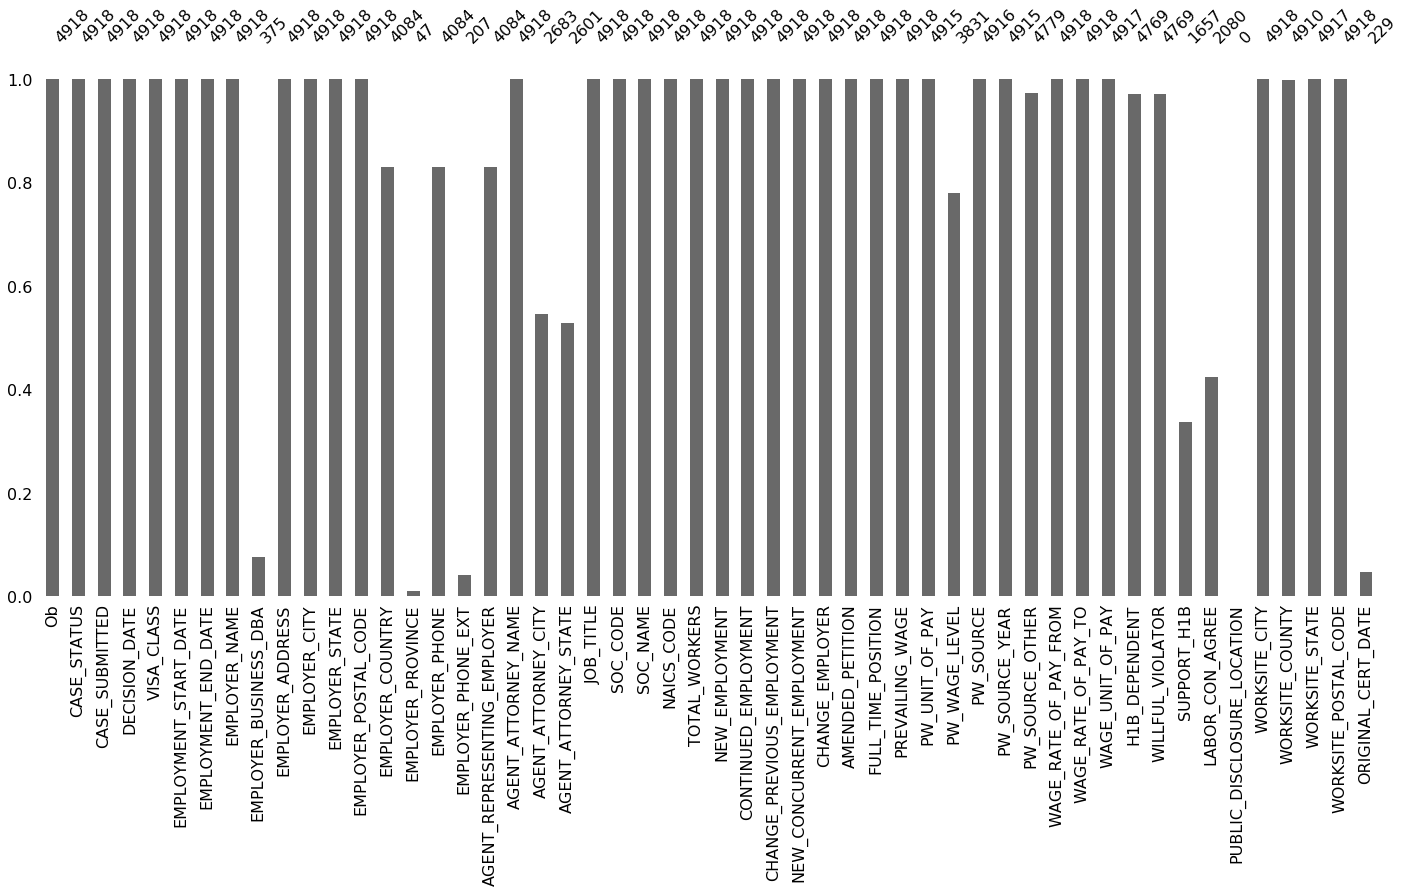

In [16]:
msno.bar(train)


# The screenshot for number of applicants applied and got approval  for H1b through 2007 -2017

# Reference: https://www.uscis.gov/sites/default/files/USCIS/Resources/Reports%20and%20Studies/Immigration%20Forms%20Data/BAHA/h-1b-2007-2017-trend-tables.pdf

# ![title](USimmigration.png)

# Cleansing and Research to understand feature variables begins..

In [17]:
%%time
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]

CPU times: user 25 ms, sys: 2.41 ms, total: 27.4 ms
Wall time: 25.7 ms


In [18]:
const_cols
train.columns

Index(['Ob', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY',
       'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT',
       'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       '

#### This confirms that their is only one column with constant value in this case it was complete missing value
#### for the column 'PUBLIC_DISCLOSURE_LOCATION' which we will remove from our dataset

In [19]:
# Originally we have 52 columns 
len(train.columns)
columns=train.columns

In [20]:
percent=train.isnull().sum()*100/len(train)
missing_values_in_percent = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent})

In [21]:
percent.sort_values(ascending=False)

PUBLIC_DISCLOSURE_LOCATION     100.000000
EMPLOYER_PROVINCE               99.044327
EMPLOYER_PHONE_EXT              95.790972
ORIGINAL_CERT_DATE              95.343636
EMPLOYER_BUSINESS_DBA           92.374949
SUPPORT_H1B                     66.307442
LABOR_CON_AGREE                 57.706385
AGENT_ATTORNEY_STATE            47.112647
AGENT_ATTORNEY_CITY             45.445303
PW_WAGE_LEVEL                   22.102481
AGENT_REPRESENTING_EMPLOYER     16.958113
EMPLOYER_PHONE                  16.958113
EMPLOYER_COUNTRY                16.958113
WILLFUL_VIOLATOR                 3.029687
H1B_DEPENDENT                    3.029687
PW_SOURCE_OTHER                  2.826352
WORKSITE_COUNTY                  0.162668
PW_UNIT_OF_PAY                   0.061000
PW_SOURCE_YEAR                   0.061000
PW_SOURCE                        0.040667
WORKSITE_STATE                   0.020333
WAGE_UNIT_OF_PAY                 0.020333
EMPLOYER_POSTAL_CODE             0.000000
CASE_SUBMITTED                   0

### Above we can see the features with missing values in percentage

In [22]:
len(train['EMPLOYER_CITY'].unique())

874

### How many applicants were approved VS denied for the visa

In [23]:
target=train['CASE_STATUS'].value_counts()
print("Visa Declined ",(2068/(2068+2850)),"%")

Visa Declined  0.42049613664091096 %


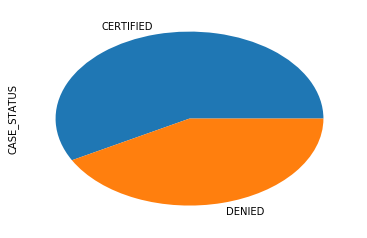

In [24]:
target.plot.pie()
# Same information visually

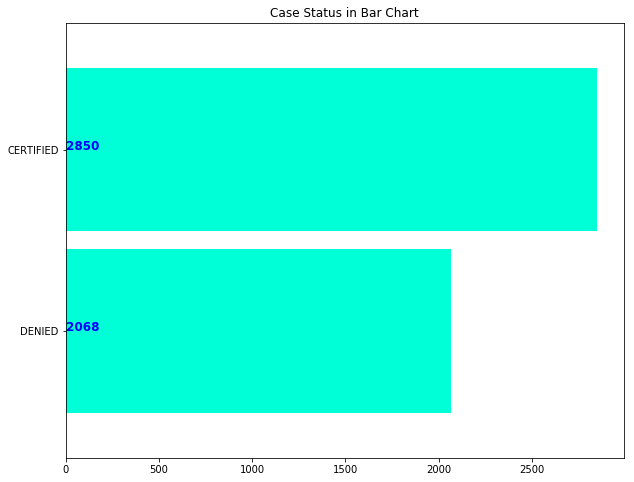

In [25]:
plt.figure(figsize=(10,8))
ax=train['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='#00ffd7')
for i, v in enumerate(train['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='b',weight='bold')
plt.title('Case Status in Bar Chart')
plt.show()

# Further Exploration

##### Before moving ahead and removing any information we would like to understand the features

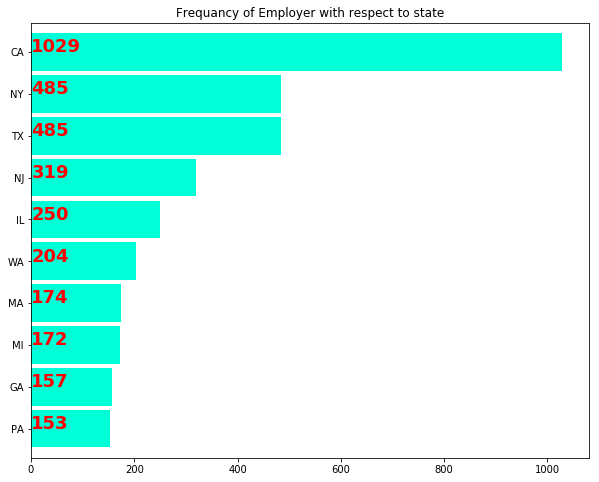

In [26]:

plt.figure(figsize=(10,8))
ax=train['WORKSITE_STATE'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#00ffd7')
for i, v in enumerate(train['WORKSITE_STATE'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.9, i, v,fontsize=18,color='r',weight='bold')
plt.title('Frequancy of Employer with respect to state')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

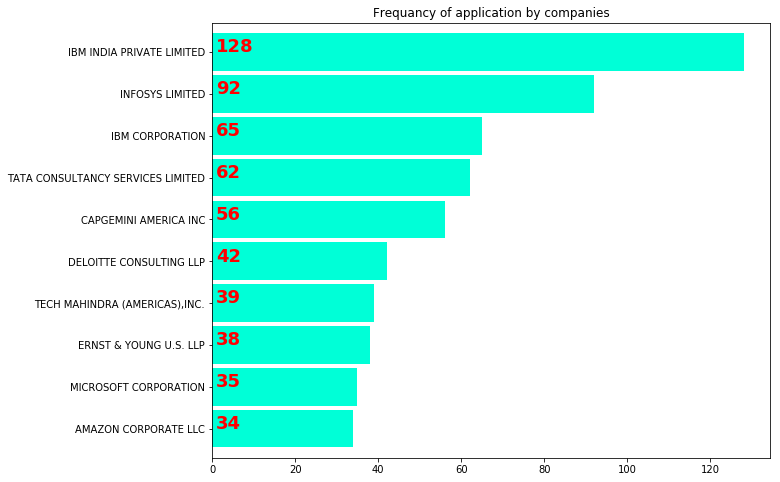

In [27]:

plt.figure(figsize=(10,8))
ax=train['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#00ffd7')
for i, v in enumerate(train['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.9, i, v,fontsize=18,color='r',weight='bold')
plt.title('Frequancy of application by companies')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

# Let us find the Acceptance rate of the Employers

In [28]:
emp_rate1=train[train['CASE_STATUS']=='CERTIFIED']
emp_rate1=emp_rate1.groupby(['EMPLOYER_NAME','CASE_STATUS'])['CASE_SUBMITTED'].count().reset_index()
emp_rate2=train[train['CASE_STATUS']=='DENIED']
emp_rate2=emp_rate2.groupby(['EMPLOYER_NAME','CASE_STATUS'])['CASE_SUBMITTED'].count().reset_index()
aa1=emp_rate2.sort_values('CASE_SUBMITTED',ascending=False)[:100]
aa2=emp_rate1.sort_values('CASE_SUBMITTED',ascending=False)[:100]
aa3=aa2.merge(aa1,left_on='EMPLOYER_NAME',right_on='EMPLOYER_NAME',how='left').dropna()
aa3['Acceptance_rate']=aa3['CASE_SUBMITTED_x']/(aa3['CASE_SUBMITTED_x']+aa3['CASE_SUBMITTED_y'])
aa3.sort_values('Acceptance_rate',ascending=False)[['EMPLOYER_NAME','Acceptance_rate']][:15]

,EMPLOYER_NAME,Acceptance_rate
7,MICROSOFT CORPORATION,0.914286
1,TATA CONSULTANCY SERVICES LIMITED,0.887097
6,ERNST & YOUNG U.S. LLP,0.868421
15,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,0.812500
2,CAPGEMINI AMERICA INC,0.803571
5,DELOITTE CONSULTING LLP,0.785714
9,WIPRO LIMITED,0.774194
34,TECHLAND INC,0.750000
43,SOGETI USA LLC,0.714286
44,BANK OF AMERICA N.A.,0.714286


##### The above summary gives an idea about acceptance rate. For example if on individual applied for visa with MICROSOFT CORPORATION He/She/other has 91 percent of chance to get visa approval

In [29]:
data_peeps=train.dropna(subset=['JOB_TITLE'])
data_peeps=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ANALYST')]
data_eng=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ENG')]


## Let's prepare dataset for Machine Learning
#### In this section we will focus on handling missing values, converting categorical values to numerical. We need to handle missing values and before feeding the data into machine learning algorithm because the mathematics under most machine learning models assume the data is numeric and contains no missing values

#### I have replaced the all missing values in column EMPLOYER_BUSINESS_DBA  

In [30]:
#train[train['EMPLOYER_COUNTRY']==train['EMPLOYER_COUNTRY'].idxmax()]

In [31]:
train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,NaN,39300 CIVIC CENTER DRIVE,...,Y,N,Y,Y,NaN,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,NaN,1600 AMPHITHEATRE PARKWAY,...,N,N,NaN,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",NaN,2001 MARATHON AVE.,...,N,N,NaN,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",NaN,39159 PASEO PADRE PARKWAY,...,Y,N,Y,Y,NaN,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",NaN,1850 GATEWAY DR.,...,N,N,NaN,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 52 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null object
CASE_SUBMITTED                 4918 non-null object
DECISION_DATE                  4918 non-null object
VISA_CLASS                     4918 non-null object
EMPLOYMENT_START_DATE          4918 non-null object
EMPLOYMENT_END_DATE            4918 non-null object
EMPLOYER_NAME                  4918 non-null object
EMPLOYER_BUSINESS_DBA          375 non-null object
EMPLOYER_ADDRESS               4918 non-null object
EMPLOYER_CITY                  4918 non-null object
EMPLOYER_STATE                 4918 non-null object
EMPLOYER_POSTAL_CODE           4918 non-null object
EMPLOYER_COUNTRY               4084 non-null object
EMPLOYER_PROVINCE              47 non-null object
EMPLOYER_PHONE                 4084 non-null object
EMPLOYER_PHONE_EXT             207 non-null object
AGENT_REPRESEN

## Cleansing 1.1 
#### Date Transformation: All the dates are in string format which we would like to convert into date
#### * We would like to see the difference of date that is employment starting date and employment end date. 
#### * We would like to see the processing time of decision making 
#### We will add a new column for each employment duration and processing time

In [33]:
train01=train.copy()

In [34]:
# Here we have transformed all the string formated dates to date format
%timeit
from datetime import datetime
train01['EMPLOYMENT_START_DATE']=pd.to_datetime(train['EMPLOYMENT_START_DATE'])
train01['EMPLOYMENT_END_DATE']=pd.to_datetime(train['EMPLOYMENT_END_DATE'])
train01['CASE_SUBMITTED']=pd.to_datetime(train['CASE_SUBMITTED'])
train01['DECISION_DATE']=pd.to_datetime(train['DECISION_DATE'])

In [35]:
# Verification of date format transformation

train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,NaN,39300 CIVIC CENTER DRIVE,...,Y,N,Y,Y,NaN,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,NaN,1600 AMPHITHEATRE PARKWAY,...,N,N,NaN,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",NaN,2001 MARATHON AVE.,...,N,N,NaN,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",NaN,39159 PASEO PADRE PARKWAY,...,Y,N,Y,Y,NaN,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",NaN,1850 GATEWAY DR.,...,N,N,NaN,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


In [36]:
# We will add a column each to see the difference between the date
start_employment=train01['EMPLOYMENT_START_DATE']
end_employment=train01['EMPLOYMENT_END_DATE']
case_submission_date=train01['CASE_SUBMITTED']
Decision_date=train01['DECISION_DATE']

train01['Employment_duration']= end_employment - start_employment
train01['Processing_time']  = Decision_date - case_submission_date

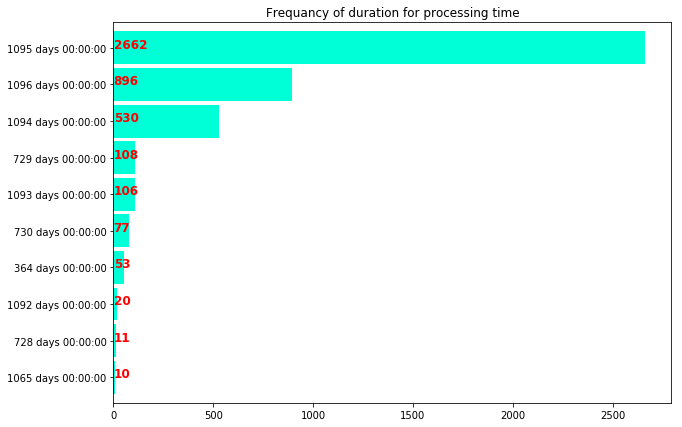

In [37]:
plt.figure(figsize=(10,7))
ax=train01['Employment_duration'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#00ffd7')
for i, v in enumerate(train01['Employment_duration'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.9, i, v,fontsize=12,color='red',weight='bold')
plt.title('Frequancy of duration for processing time')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

#### Most of the job offered were 1095 which is 3 years 

In [38]:
train.shape

(4918, 52)

In [39]:
wagerate = train.loc[train['WAGE_RATE_OF_PAY_TO'] >0 , ['EMPLOYER_NAME','CASE_STATUS','WAGE_RATE_OF_PAY_TO']]
wagerate.sort_values(by='WAGE_RATE_OF_PAY_TO',ascending=False)


,EMPLOYER_NAME,CASE_STATUS,WAGE_RATE_OF_PAY_TO
2061,BLACK & VEATCH CORPORATION,DENIED,804391.00
1330,"NORTHERN NEVADA MEDICAL GROUP, LLC",DENIED,550000.00
3919,MERCY CLINIC EAST COMMUNITIES,CERTIFIED,480000.00
2152,TEXAS CHILDREN'S PHYSICIAN'S GROUP,CERTIFIED,461120.00
4348,"MICHIGAN CARDIOVASCULAR INSTITUTE, PC",CERTIFIED,425000.00
4783,"PEDIATRIC GROUP OF ACADIANA, LLC",CERTIFIED,388000.00
2708,"MCKINSEY & COMPANY, INC. UNITED STATES",CERTIFIED,375000.00
4366,DARTMOUTH-HITCHCOCK CLINIC,CERTIFIED,350000.00
4721,DELOITTE CONSULTING LLP,CERTIFIED,320200.00
3236,APPLE INC.,CERTIFIED,310000.00


# Cleansing 1.2 Imputing Missing Values and transforming the object variables in number for modeling

In [40]:
train.CASE_STATUS.replace(('CERTIFIED', 'DENIED'), (1, 0), inplace=True)
# Changing the CASE_STATUS column to 0 and 1 where 0 = DENIED A and 1 = CERTIFIED


In [41]:
# SUPPORT_H1B had 3 unique values Y,N and nan this step will replace all nan
# with 2



# Transformation of TRAIN

In [42]:
train['EMPLOYER_PHONE'] = (
    pd.to_numeric(train['EMPLOYER_PHONE'],
                  errors='coerce')
      .fillna(0)
    )


train['EMPLOYER_PHONE_EXT'] = (
    pd.to_numeric(train['EMPLOYER_PHONE_EXT'],
                  errors='coerce')
      .fillna(0)
    )
train.drop('EMPLOYER_COUNTRY',axis=1,inplace=True)

 #Replacing NaN value in column with EMPLOYER_PHONE_EXT with 0
train['EMPLOYER_PHONE_EXT'].replace(0, np.nan, inplace= True)
#Replacing NaN value in column with EMPLOYER_PHONE with 0
train['EMPLOYER_PHONE'].replace(0, np.nan, inplace= True)

train['SUPPORT_H1B'].fillna(value=0,inplace=True)
train['EMPLOYER_PHONE'].isna().sum()
# we had 834 missing values i.e employer did not provide phone number which we are converting to 0
train['EMPLOYER_PHONE'].fillna(value=0,inplace=True)
#E_3 = train.loc[train['VISA_CLASS'] == 'E-3 Australian', ['CASE_STATUS']]
#E_3

train['AGENT_ATTORNEY_CITY'].fillna(value=0,inplace=True)
train['AGENT_ATTORNEY_STATE'].fillna(value=0,inplace=True)

train['EMPLOYER_PROVINCE'].fillna(value=0,inplace=True)
train['EMPLOYER_PHONE_EXT'].fillna(value=0,inplace=True)
train['EMPLOYER_BUSINESS_DBA'].fillna(value=0,inplace=True)
train['PW_WAGE_LEVEL'].fillna(value=0,inplace=True)
# We are replacing missing values with 0 for this column 
train['AGENT_REPRESENTING_EMPLOYER'].fillna(value=0,inplace=True)
# this step will replace all the column rows with Y and N to 1 and 0
train['SUPPORT_H1B']=pd.Series(np.where(train.SUPPORT_H1B.values=='Y',0,1),train.index)
train['EMPLOYER_PROVINCE'].fillna(value=0,inplace=True)
train['LABOR_CON_AGREE'].fillna(value=0,inplace=True)
train['ORIGINAL_CERT_DATE'].fillna(value=0,inplace=True)
train['PW_SOURCE_OTHER'].fillna(value=0,inplace=True)
train['H1B_DEPENDENT'].fillna(value=0,inplace=True)
train['WILLFUL_VIOLATOR'].fillna(value=0,inplace=True)
train.drop('PUBLIC_DISCLOSURE_LOCATION',axis=1,inplace=True)

# Transformation of TEST

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 50 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null int64
CASE_SUBMITTED                 4918 non-null object
DECISION_DATE                  4918 non-null object
VISA_CLASS                     4918 non-null object
EMPLOYMENT_START_DATE          4918 non-null object
EMPLOYMENT_END_DATE            4918 non-null object
EMPLOYER_NAME                  4918 non-null object
EMPLOYER_BUSINESS_DBA          4918 non-null object
EMPLOYER_ADDRESS               4918 non-null object
EMPLOYER_CITY                  4918 non-null object
EMPLOYER_STATE                 4918 non-null object
EMPLOYER_POSTAL_CODE           4918 non-null object
EMPLOYER_PROVINCE              4918 non-null object
EMPLOYER_PHONE                 4918 non-null float64
EMPLOYER_PHONE_EXT             4918 non-null float64
AGENT_REPRESENTING_EMPLOYER    4918 non-null object
AGENT_ATT

In [44]:
test['EMPLOYER_PHONE'] = (
    pd.to_numeric(test['EMPLOYER_PHONE'],
                  errors='coerce')
      .fillna(0)
    )


test['EMPLOYER_PHONE_EXT'] = (
    pd.to_numeric(test['EMPLOYER_PHONE_EXT'],
                  errors='coerce')
      .fillna(0)
    )


 #Replacing NaN value in column with EMPLOYER_PHONE_EXT with 0
test['EMPLOYER_PHONE_EXT'].replace(0, np.nan, inplace= True)
#Replacing NaN value in column with EMPLOYER_PHONE with 0
test['EMPLOYER_PHONE'].replace(0, np.nan, inplace= True)

test['SUPPORT_H1B'].fillna(value=0,inplace=True)
test['EMPLOYER_PHONE'].isna().sum()
# we had 834 missing values i.e employer did not provide phone number which we are converting to 0
test['EMPLOYER_PHONE'].fillna(value=0,inplace=True)
#E_3 = train.loc[train['VISA_CLASS'] == 'E-3 Australian', ['CASE_STATUS']]
#E_3

test['AGENT_ATTORNEY_CITY'].fillna(value=0,inplace=True)
test['AGENT_ATTORNEY_STATE'].fillna(value=0,inplace=True)

test['EMPLOYER_PROVINCE'].fillna(value=0,inplace=True)
test['EMPLOYER_PHONE_EXT'].fillna(value=0,inplace=True)
test['EMPLOYER_BUSINESS_DBA'].fillna(value=0,inplace=True)
test['PW_WAGE_LEVEL'].fillna(value=0,inplace=True)
# We are replacing missing values with 0 for this column 
test['AGENT_REPRESENTING_EMPLOYER'].fillna(value=0,inplace=True)
# this step will replace all the column rows with Y and N to 1 and 0

test['EMPLOYER_PROVINCE'].fillna(value=0,inplace=True)
test['PW_SOURCE_OTHER'].fillna(value=0,inplace=True)
test['H1B_DEPENDENT'].fillna(value=0,inplace=True)
test['WILLFUL_VIOLATOR'].fillna(value=0,inplace=True)

#COLUMNS TO BE DROPPED
test.drop('EMPLOYER_COUNTRY',axis=1,inplace=True)
test['LABOR_CON_AGREE'].fillna(value=0,inplace=True)
test.fillna(value=0,inplace=True)

In [45]:
#train01=train.drop(['CASE_SUBMITTED', 'DECISION_DATE'], axis=1)

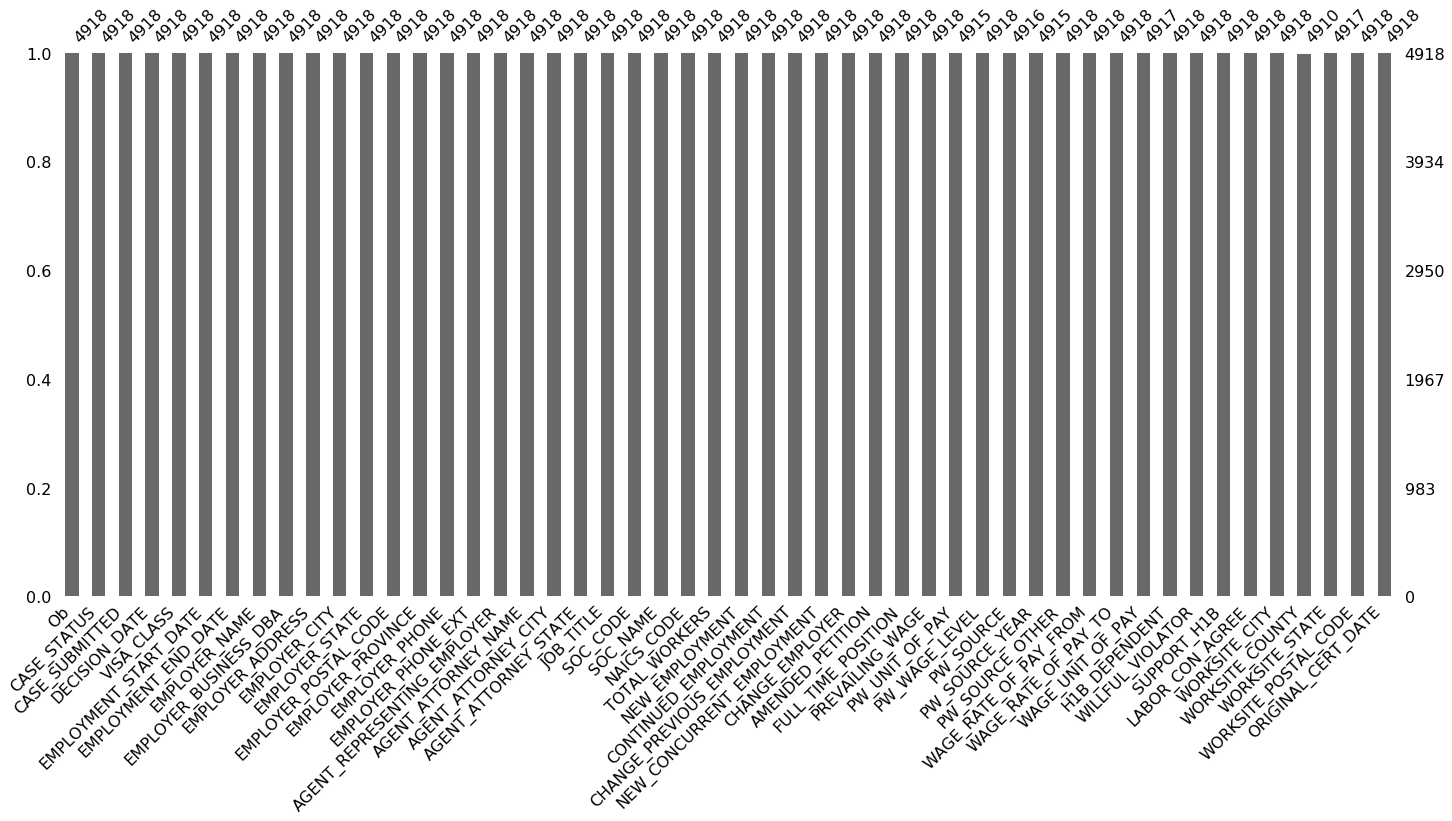

In [46]:
msno.bar(train)

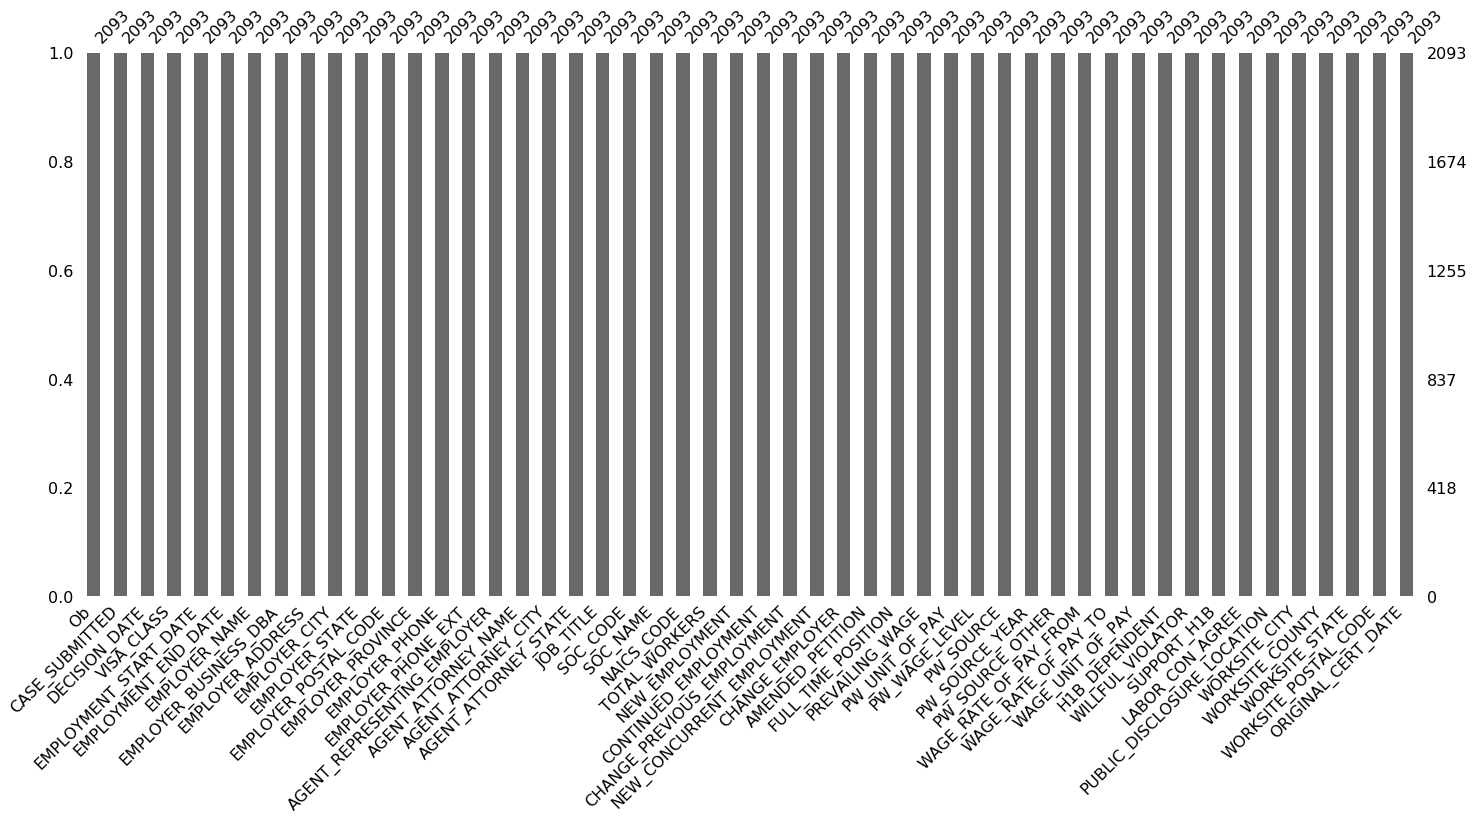

In [47]:
msno.bar(test)

#### We have been able to transform data from some columns with missing values to complete data as we can see in above plot

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 50 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null int64
CASE_SUBMITTED                 4918 non-null object
DECISION_DATE                  4918 non-null object
VISA_CLASS                     4918 non-null object
EMPLOYMENT_START_DATE          4918 non-null object
EMPLOYMENT_END_DATE            4918 non-null object
EMPLOYER_NAME                  4918 non-null object
EMPLOYER_BUSINESS_DBA          4918 non-null object
EMPLOYER_ADDRESS               4918 non-null object
EMPLOYER_CITY                  4918 non-null object
EMPLOYER_STATE                 4918 non-null object
EMPLOYER_POSTAL_CODE           4918 non-null object
EMPLOYER_PROVINCE              4918 non-null object
EMPLOYER_PHONE                 4918 non-null float64
EMPLOYER_PHONE_EXT             4918 non-null float64
AGENT_REPRESENTING_EMPLOYER    4918 non-null object
AGENT_ATT

In [49]:
train['SUPPORT_H1B'] = train['SUPPORT_H1B'].astype('int64')

In [50]:
cat_columns = train.select_dtypes(['object']).columns

for col in cat_columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 50 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null int64
CASE_SUBMITTED                 4918 non-null int64
DECISION_DATE                  4918 non-null int64
VISA_CLASS                     4918 non-null int64
EMPLOYMENT_START_DATE          4918 non-null int64
EMPLOYMENT_END_DATE            4918 non-null int64
EMPLOYER_NAME                  4918 non-null int64
EMPLOYER_BUSINESS_DBA          4918 non-null int64
EMPLOYER_ADDRESS               4918 non-null int64
EMPLOYER_CITY                  4918 non-null int64
EMPLOYER_STATE                 4918 non-null int64
EMPLOYER_POSTAL_CODE           4918 non-null int64
EMPLOYER_PROVINCE              4918 non-null int64
EMPLOYER_PHONE                 4918 non-null float64
EMPLOYER_PHONE_EXT             4918 non-null float64
AGENT_REPRESENTING_EMPLOYER    4918 non-null int64
AGENT_ATTORNEY_NAME   

In [52]:
feature_cols=['Ob', 'VISA_CLASS', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PROVINCE',
       'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'ORIGINAL_CERT_DATE']


# Plotting timeseries

In [53]:
# Feature extraction
# Model Fitting
# Prediction and validation
#


In [54]:
cat_man_sel=['VISA_CLASS','EMPLOYER_BUSINESS_DBA','EMPLOYER_CITY','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE',]

In [65]:
cat_man_sel=['VISA_CLASS','EMPLOYER_BUSINESS_DBA','EMPLOYER_CITY','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE']

###  Below we will try to transform all the column with float values to be able to use the data in modeling

In [55]:
train['EMPLOYER_PHONE'] = train['EMPLOYER_PHONE'].astype('float32')
train['EMPLOYER_PHONE_EXT'] = train['EMPLOYER_PHONE_EXT'].astype('float32')
train['EMPLOYER_PHONE_EXT'] = train['EMPLOYER_PHONE_EXT'].astype('float32')
train['PREVAILING_WAGE'] = train['PREVAILING_WAGE'].astype('float32')
train['WAGE_RATE_OF_PAY_FROM'] = train['WAGE_RATE_OF_PAY_FROM'].astype('float32')
train['WAGE_RATE_OF_PAY_TO'] = train['WAGE_RATE_OF_PAY_TO'].astype('float32')
train['PW_SOURCE_YEAR'] = train['PW_SOURCE_YEAR'].astype('float32')

# Baseline model

# Logistic Regression

In [66]:
y=train['CASE_STATUS'].copy()

In [67]:
X=train[[ 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PROVINCE',
       'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'ORIGINAL_CERT_DATE']].copy()

In [68]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(fit_intercept=True,C=1e15)

In [69]:
num_iter=100000
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=100)
clf.fit(train[['JOB_TITLE','EMPLOYER_NAME','WAGE_RATE_OF_PAY_TO','SUPPORT_H1B','H1B_DEPENDENT','WORKSITE_CITY','EMPLOYER_PHONE_EXT','EMPLOYER_PROVINCE','WAGE_RATE_OF_PAY_FROM']], y)
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Learning rate: 0.1
Iteration: 100000


In [70]:
#result3 = clf.predict(train[['JOB_TITLE','EMPLOYER_NAME','WAGE_RATE_OF_PAY_TO','SUPPORT_H1B','H1B_DEPENDENT','WORKSITE_CITY','EMPLOYER_PHONE_EXT','EMPLOYER_PROVINCE','WAGE_RATE_OF_PAY_FROM','EMPLOYMENT_START_DATE']])
LogisticModel = clf.predict(train[['JOB_TITLE','EMPLOYER_NAME','WAGE_RATE_OF_PAY_TO','SUPPORT_H1B','H1B_DEPENDENT','WORKSITE_CITY','EMPLOYER_PHONE_EXT','EMPLOYER_PROVINCE','WAGE_RATE_OF_PAY_FROM']])

In [80]:
print("Accuracy (sklearn's Logistic Regression):")
f3 = pd.DataFrame(LogisticModel).join(y)
f3.loc[f3[0]==f3['CASE_STATUS']].shape[0] / f3.shape[0] * 100

Accuracy (sklearn's Logistic Regression):


58.01138674257829

In [ ]:
https://www.linkedin.com/in/mnargiz/

Hi Nargiz,



Last time we met you have told me that you would be back from vacation today. I just wanted to let you know that I have been working on the https://www.kaggle.com/c/h1b-visanew

